In [1]:
import pymupdf

In [2]:
doc = pymupdf.open("ic-2021-02379u.R2_Proof_hi.pdf")

In [3]:
for page_index in range(len(doc)): # iterate over pdf pages
    page = doc[page_index] # get the page
    image_list = page.get_images()
    # print the number of images found on the page
    if image_list:
        print(f"Found {len(image_list)} images on page {page_index}")
    else:
        print("No images found on page", page_index)
    for image_index, img in enumerate(image_list, start=1): # enumerate the␣image list
        xref = img[0] # get the XREF of the image
        pix = pymupdf.Pixmap(doc, xref) # create a Pixmap
        if pix.n - pix.alpha > 3: # CMYK: convert to RGB first
            pix = pymupdf.Pixmap(pymupdf.csRGB, pix)
        pix.save("page_%s-image_%s.png" % (page_index, image_index)) # save the␣image as png
        pix = None

Found 2 images on page 0
Found 1 images on page 1
No images found on page 2
No images found on page 3
No images found on page 4
No images found on page 5
No images found on page 6
No images found on page 7
No images found on page 8
No images found on page 9
Found 1 images on page 10
No images found on page 11
No images found on page 12
No images found on page 13
Found 1 images on page 14
No images found on page 15
Found 1 images on page 16
No images found on page 17
No images found on page 18
Found 1 images on page 19
No images found on page 20
Found 1 images on page 21
No images found on page 22
Found 1 images on page 23
Found 1 images on page 24
No images found on page 25
Found 1 images on page 26
No images found on page 27
No images found on page 28
No images found on page 29
No images found on page 30
No images found on page 31
Found 1 images on page 32
No images found on page 33
No images found on page 34
No images found on page 35
No images found on page 36
No images found on pag

In [4]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


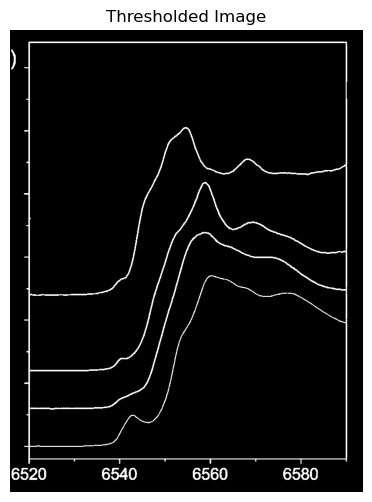

In [5]:
# Load image
img = cv2.imread("page_14-image_1(1).png", cv2.IMREAD_GRAYSCALE)
# Thresholding to binary image
# Step 5: Try adaptive thresholding for more detailed retention
#thresh = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=1)  # Adjust blockSize and C
_, thresh = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
# Step: Thresholded Image
plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()


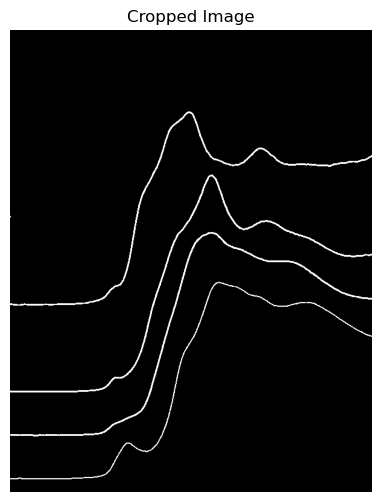

In [6]:
# Step 1: Crop the image to focus on the graph area
# Assuming the graph occupies most of the image, we manually crop out the borders
# Adjust these values according to your image's borders
cropped_img = thresh[50:-65, 38:-35] # Adjust crop dimensions as needed
# cropped_img = thresh[71:-63, 30:-35] # Adjust crop dimensions as needed
# Step: Thresholded Image
plt.figure(figsize=(6, 6))
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()

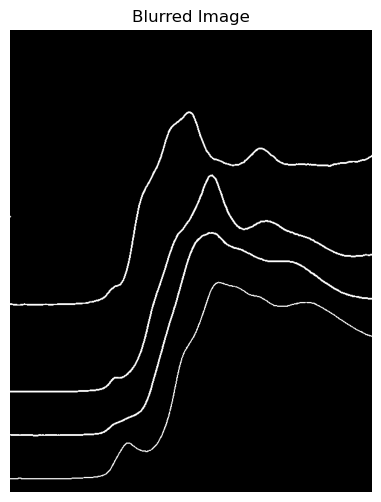

In [7]:
# Apply Gaussian Blur (optional, may help smooth lines)
blurred_img = cv2.GaussianBlur(cropped_img, (1, 1), 0)
#edges = cv2.Canny(blurred_img, 30, 150)
# Step: Blurred + Threshholded Image
plt.figure(figsize=(6, 6))
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.show()

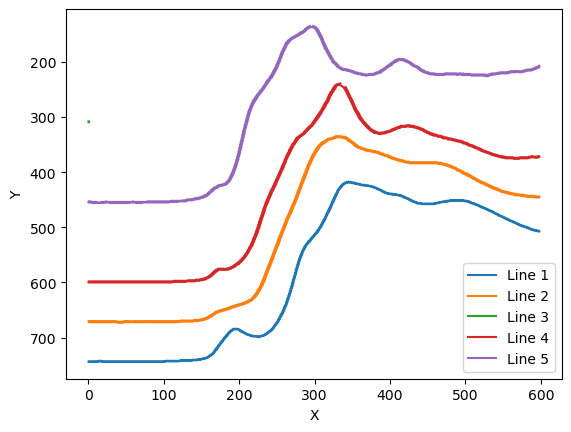

Contours found: 5


{'line_1':        x    y
 0    345  417
 1    344  418
 2    342  418
 3    341  419
 4    340  419
 ..   ...  ...
 801  354  420
 802  353  419
 803  350  419
 804  349  418
 805  346  418
 
 [806 rows x 2 columns],
 'line_2':        x    y
 0    328  335
 1    327  336
 2    326  336
 3    324  338
 4    322  338
 ..   ...  ...
 778  337  336
 779  336  335
 780  332  335
 781  331  336
 782  330  335
 
 [783 rows x 2 columns],
 'line_3':    x    y
 0  0  308
 1  0  310
 2  1  309,
 'line_4':        x    y
 0    334  239
 1    333  240
 2    331  240
 3    330  241
 4    329  241
 ..   ...  ...
 879  343  251
 880  342  250
 881  342  248
 882  341  247
 883  341  246
 
 [884 rows x 2 columns],
 'line_5':        x    y
 0    294  135
 1    293  136
 2    292  136
 3    287  141
 4    287  142
 ..   ...  ...
 769  303  140
 770  303  139
 771  300  136
 772  299  136
 773  298  135
 
 [774 rows x 2 columns]}

In [8]:
# Find contours of the lines
contours, _ = cv2.findContours(blurred_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# Create lists to store the x and y coordinates of each line
lines_data = {}
# Loop through contours to extract data points for each line
for i, contour in enumerate(contours):
# Get the contour's points and flatten to a 2D array
    contour_points = contour.squeeze()
# Separate x and y coordinates
    x_coords = contour_points[:, 0]
    y_coords = contour_points[:, 1]
# Store the line's data points
    lines_data[f'line_{i+1}'] = {'x': x_coords, 'y': y_coords}
# Optionally, plot each line
    plt.plot(x_coords, y_coords, label=f'Line {i+1}')
# Show the lines on a plot
plt.gca().invert_yaxis() # Invert y-axis to match image coordinate system
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
# Convert the extracted data to pandas DataFrames
dataframes = {}
for line_name, data in lines_data.items():
    dataframes[line_name] = pd.DataFrame({'x': data['x'], 'y': data['y']})
print("Contours found: "+str(len(contours)))
dataframes


In [9]:
data_line5 = dataframes["line_5"]
data_line5

,x,y
0,294,135
1,293,136
2,292,136
3,287,141
4,287,142
...,...,...
769,303,140
770,303,139
771,300,136
772,299,136


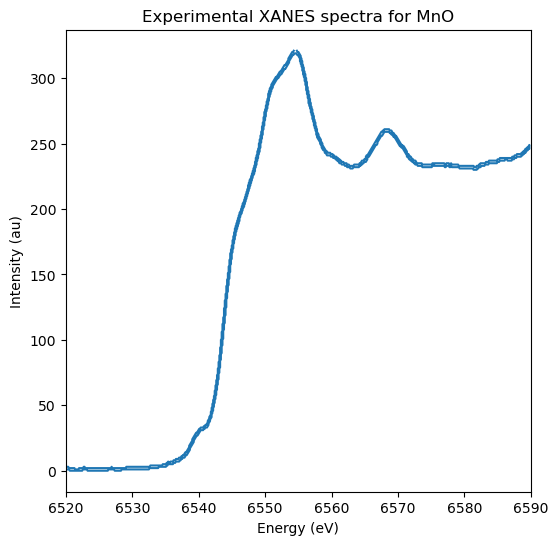

,x,y
0,6554.300000,321
1,6554.183333,320
2,6554.066667,320
3,6553.483333,315
4,6553.483333,314
...,...,...
769,6555.350000,316
770,6555.350000,317
771,6555.000000,320
772,6554.883333,320


In [10]:
plt.figure(figsize=(6, 6))  # Set the figure size if needed

# Plot the 'x' and 'y' columns
data_line5['x']=data_line5['x']*(70/600)+6520
max_absorption = np.max(data_line5['y'])
data_line5['y']=np.abs(data_line5['y']-max_absorption)
plt.plot(data_line5['x'], data_line5['y'], label='Line 5')
plt.xlim(6520, 6590)  # Replace with the desired min and max for your x-axis

# Add labels and a title to the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (au)')
plt.title('Experimental XANES spectra for MnO')
# Show the plot
plt.show()
data_line5

c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


Text(0.5, 1.0, 'First Derivative of the Experimental XANES Spectra for MnO')

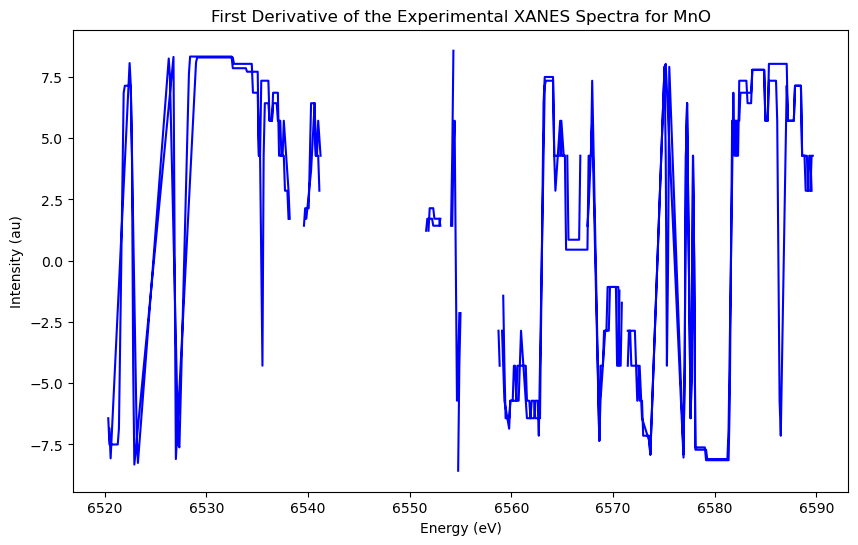

In [11]:
# Calculate the first derivative of the absorption spectrum
derivative_absorption = np.gradient(data_line5['y'].values, data_line5['x'].values)

# Plot the derived graph of original absorption spectrum
plt.figure(figsize=(10, 6))
plt.plot(data_line5['x'].values, derivative_absorption, label='Derived Spectrum', color='blue')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (au)')
plt.title('First Derivative of the Experimental XANES Spectra for MnO')

In [12]:
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit

def polynomial(x, *coeffs):
    """Polynomial function for fitting."""
    return sum(c * (x ** i) for i, c in enumerate(coeffs))

def edge_jump_normalization(energy, mu):
    # Step 1: Determine E0 as the maximum of the first derivative
    first_derivative = np.gradient(mu, energy)
    e0_index = argrelextrema(first_derivative, np.greater)[0]
    
    if len(e0_index) == 0:
        raise ValueError("No edge found in the spectrum.")
    
    e0 = energy[e0_index[0]]  # Use the first maximum found
    print(f"E0 determined at: {e0} eV")
    
    # Step 2: Fit polynomials to pre-edge and post-edge regions
    pre_edge_range = (energy < e0 - 10)  # Adjust range as needed
    post_edge_range = (energy > e0 + 10)  # Adjust range as needed

    # Fit polynomial to pre-edge region
    pre_edge_fit = curve_fit(polynomial, energy[pre_edge_range], mu[pre_edge_range], p0=[1]*3)[0]
    
    # Fit polynomial to post-edge region
    post_edge_fit = curve_fit(polynomial, energy[post_edge_range], mu[post_edge_range], p0=[1]*3)[0]

    # Step 3: Extrapolate both fits to E0 to determine the edge jump
    pre_edge_value = polynomial(e0, *pre_edge_fit)
    post_edge_value = polynomial(e0, *post_edge_fit)

    edge_jump = post_edge_value - pre_edge_value
    print(f"Edge jump calculated: {edge_jump}")

    # Step 4: Normalize the spectrum
    normalized_mu = (mu - pre_edge_value) / edge_jump
    
    return energy, normalized_mu

In [13]:
# Perform normalization for experimental data
normalized_energy, normalized_mu = edge_jump_normalization(data_line5['x'].values, data_line5['y'].values)
E0_experiment= normalized_energy[1]

c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1243: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\Mthombeni Neo\anaconda3\Lib\site-packages\numpy\lib\function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


E0 determined at: 6551.733333333334 eV
Edge jump calculated: 130.30329272174276


In [14]:
# add the normalized results back to the DataFrame
data_line5['normalized_y'] = normalized_mu
# Print or display the updated DataFrame
print(data_line5.head())

             x    y  normalized_y
0  6554.300000  321      1.571017
1  6554.183333  320      1.563342
2  6554.066667  320      1.563342
3  6553.483333  315      1.524970
4  6553.483333  314      1.517296


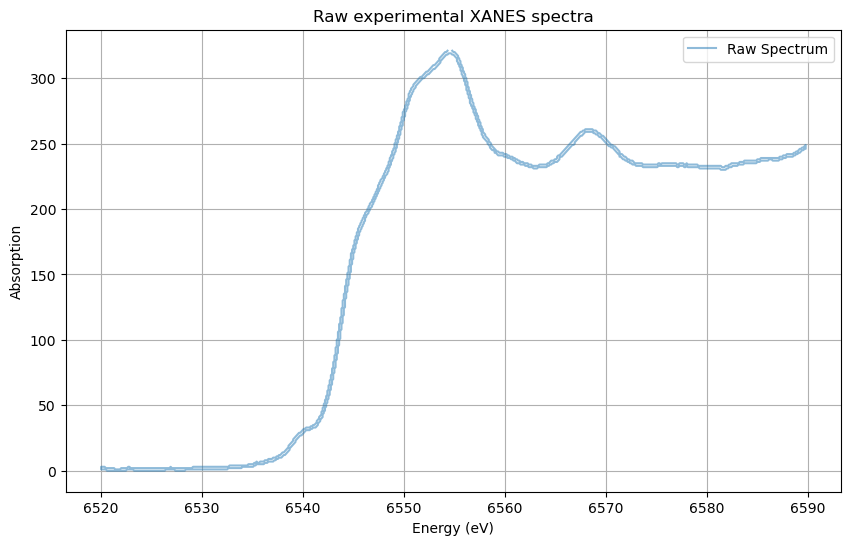

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data_line5['x'], data_line5['y'], label='Raw Spectrum', alpha=0.5)
plt.xlabel('Energy (eV)')
plt.ylabel('Absorption')
plt.title('Raw experimental XANES spectra')
plt.legend()
plt.grid()
plt.show()

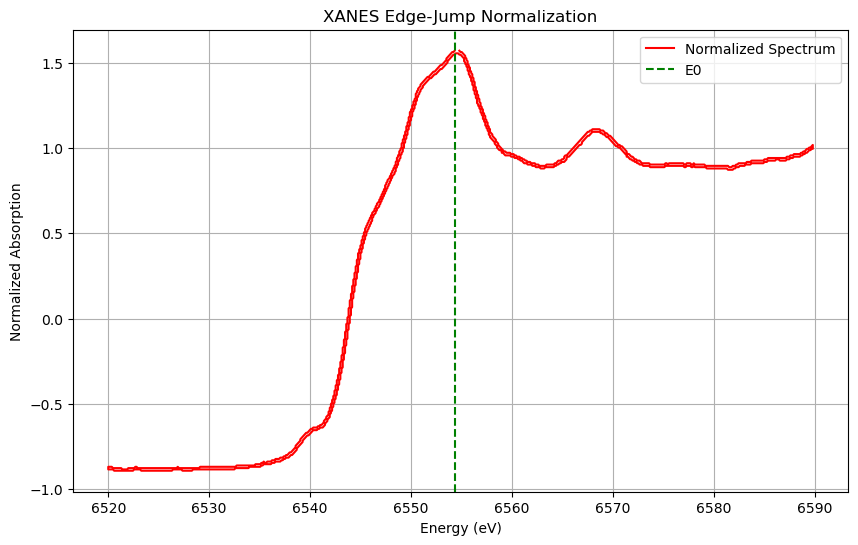

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(normalized_energy, data_line5['normalized_y'], label='Normalized Spectrum', color='red')
plt.axvline(x=normalized_energy[np.argmax(normalized_mu)], color='green', linestyle='--', label='E0')
plt.xlabel('Energy (eV)')
plt.ylabel('Normalized Absorption')
plt.title('XANES Edge-Jump Normalization')
plt.legend()
plt.grid()
plt.show()

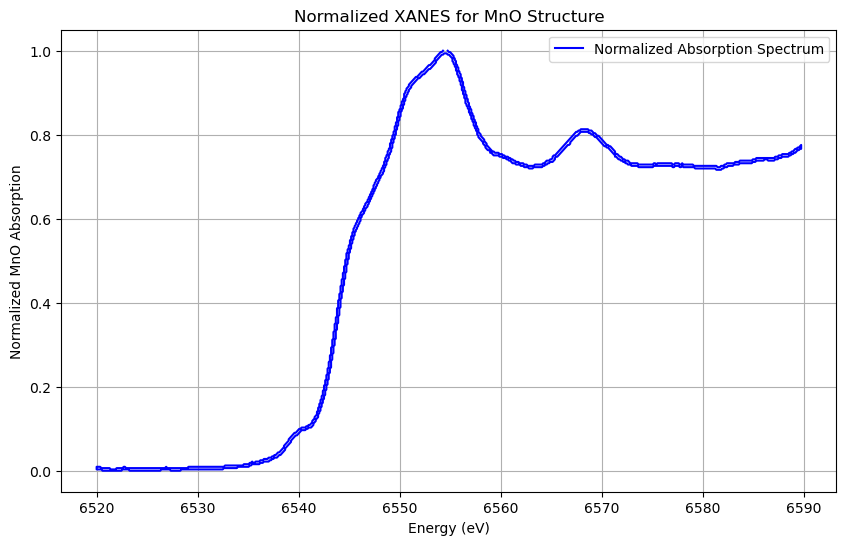

In [17]:
# Split the data into energy and absorption

absorption =data_line5["y"]  # Absorption column of the data

# Normalize the absorption data
min_absorption = np.min(absorption)
max_absorption = np.max(absorption)
norm_absorption = absorption /(max_absorption - min_absorption)

# Create the plot
data_line5["y"]=norm_absorption

plt.figure(figsize=(10, 6))
# plt.gca().invert_yaxis()  # Invert y-axis if needed
plt.plot(data_line5["x"], data_line5["y"], label='Normalized Absorption Spectrum', color='blue')
plt.xlabel('Energy (eV)')  # Adjust as needed
plt.ylabel('Normalized MnO Absorption')
plt.title('Normalized XANES for MnO Structure')
plt.grid(True)
plt.legend()
plt.show()

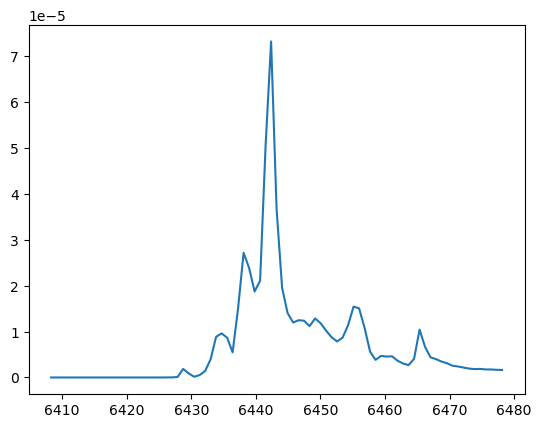

In [18]:
# Load the data
data = np.loadtxt('CORE_DIELECTRIC_IMAG.dat')
data = pd.DataFrame(data, columns=['Energy (eV)', 'Absorption'])
# data['Energy (eV)'] = data['Energy (eV)']+(E0_experiment-E0_data)
# Filter the DataFrame to only include rows where Energy >= 6520
data = data[(data["Energy (eV)"] >= 6408) & (data["Energy (eV)"] <= 6478.5)]
data
plt.plot(data['Energy (eV)'], data['Absorption'])

In [19]:
# Perform normalization for theoretical data
normalized_energy, normalized_mu = edge_jump_normalization(data['Energy (eV)'].values, data['Absorption'].values)
E0_data= normalized_energy[1]

E0 determined at: 6427.885770390132 eV
Edge jump calculated: 5.7259652273655703e-05


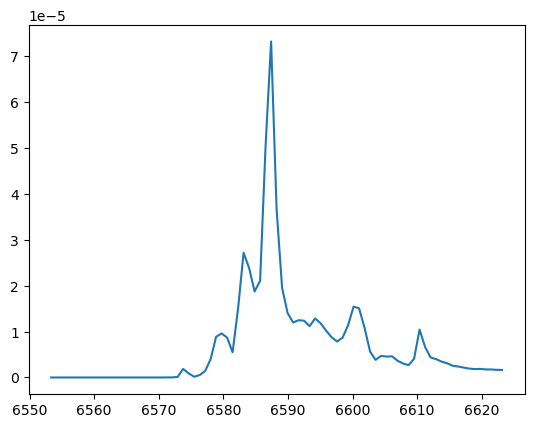

In [20]:
# # Shifting the energy of the VASP outputs to the experimental data, to match the E0
# data['Energy (eV)'] = data['Energy (eV)']+(E0_experiment-E0_data)
# Define the original coordinates of the point you want to shift
original_point = (E0_data, data.loc[data['Energy (eV)'] == E0_data, 'Absorption'].values[0])  # Original point at 6500 eV

# Define the new destination coordinates for that point
destination_point = (E0_experiment, original_point[1])  # Shift to 6550 eV, keeping the same absorption value

# Calculate the shift in energy
shift_amount = destination_point[0] - original_point[0]

# Shift the entire spectrum by the calculated amount
data['Energy (eV)'] += shift_amount
data
plt.plot(data['Energy (eV)'], data['Absorption'])

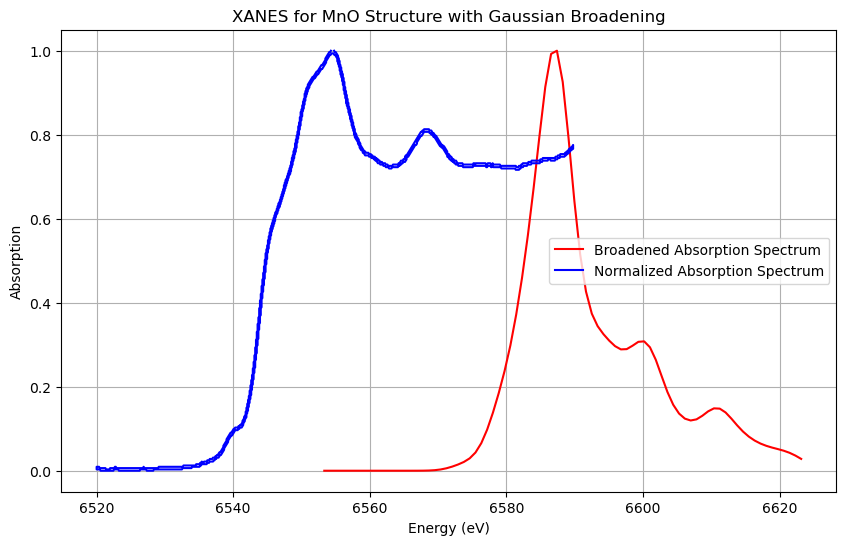

In [21]:
# Check if the filtered DataFrame is empty
if data.empty:
    print("No data available after filtering.")
else:
    # Split the data into energy and absorption
    energy = data["Energy (eV)"].values  # Energy values as numpy array
    absorption = data["Absorption"].values  # Absorption values as numpy array

    # Parameters for Gaussian broadening
    broadening_factor = 2 # Adjust this value to control broadening width

    # Define the Gaussian function
    def gaussian(x, x0, sigma):
        return np.exp(-(x - x0)**2 / (2 * sigma**2))

    # Create an array for the broadened absorption
    broadened_absorption = np.zeros_like(absorption)

    # Loop over each energy point and apply Gaussian broadening
    for i in range(len(energy)):
        broadened_absorption += absorption[i] * gaussian(energy, energy[i], broadening_factor)

    # Normalize the result
    broadened_absorption /= np.max(broadened_absorption)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(energy, broadened_absorption, label='Broadened Absorption Spectrum', color='Red')
    plt.plot(data_line5["x"], data_line5["y"], label='Normalized Absorption Spectrum', color='blue')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Absorption')
    plt.title('XANES for MnO Structure with Gaussian Broadening')
    plt.grid(True)
    plt.legend()
    plt.show()
    